# Data Upload

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import torch as torch

import tensorflow_datasets as tfds
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import montage

import pandas as pd
import cv2
import keras
import numpy as np


from sklearn.metrics import accuracy_score
from tqdm.autonotebook import tqdm


from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def see_data(i):
    print("---Showing img #" + str(i) +"---")
    print("Shape: " + str(training_data[i][0].shape))
    print("Label: " +  str(training_data[i][1] + 1))
    print("Array: " + str(training_data[i][0]))
    plt.imshow(training_data[i][0])
    plt.show()
    print("---Show done---")

def see_data_t(i):
    print("---Showing img #" + str(i) +"---")
    print("Shape: " + str(training_data[i][0].shape))
    print("Array: " + str(training_data[i][0]))
    plt.imshow(training_data[i][0])
    plt.show()
    print("---Show done---")

def print_perc(l):
    c1=0
    c2=0
    c3=0
    c4=0
    c5=0
    total = len(l)
    for label in l:
        if(label == 0):
            c1 += 1
        if(label == 1):
            c2 += 1
        if(label == 2):
            c3 += 1
        if(label == 3):
            c4 += 1
        if(label == 4):
            c5 += 1
    
    print("Percentage of 1: %" + str(format( c1/total*100, '.2f') ) )
    print("Percentage of 2: %" + str(format( c2/total*100, '.2f') ) )
    print("Percentage of 3: %" + str(format( c3/total*100, '.2f') ) )
    print("Percentage of 4: %" + str(format( c4/total*100, '.2f') ) )
    print("Percentage of 5: %" + str(format( c5/total*100, '.2f') ) )


In [0]:
import pickle

IMG_SIZE = 128
training_data = []
# should be changed to your own path on where you saved your trimmed_cropped data
training_data = pickle.load(open("/content/drive/My Drive/CS412 PROJECT/Final Notebooks/pickle/Training_data_trimmed_crop.pickle", "rb"))

In [0]:
# for i in range(len(training_data)):
#     training_data[i][0] = cv2.resize(training_data[i][0], (IMG_SIZE,IMG_SIZE))

# Split and Modify Data

In [0]:
print(len(training_data))

10000


---Showing img #31---
Shape: (128, 128, 3)
Label: 1
Array: [[[ 5  1  0]
  [ 5  1  0]
  [ 3  2  0]
  ...
  [ 1  0  2]
  [ 5  0  1]
  [ 6  0  2]]

 [[ 3  0  0]
  [ 4  0  0]
  [ 2  1  0]
  ...
  [ 2  0  3]
  [ 5  1  2]
  [ 6  2  3]]

 [[ 3  0  0]
  [ 4  0  0]
  [ 3  2  0]
  ...
  [ 2  0  3]
  [ 4  2  5]
  [ 5  3  6]]

 ...

 [[ 1  0  8]
  [ 1  0  8]
  [ 0  0  5]
  ...
  [ 3  1  2]
  [ 4  0  0]
  [ 7  1  1]]

 [[ 2  0  8]
  [ 0  0  7]
  [ 0  0  7]
  ...
  [ 4  0  1]
  [ 5  0  0]
  [10  1  2]]

 [[ 4  1 10]
  [ 1  0  8]
  [ 0  0  7]
  ...
  [ 5  1  2]
  [ 9  0  3]
  [14  4  5]]]


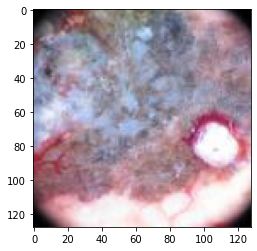

---Show done---


In [0]:
see_data(31)

# Transfer Leaning

In [0]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)   #gray scale 1 --> 3 for RGB
y = np.array(y)

In [0]:
X = X/255.0

In [0]:
X, valid_X, y, valid_y = train_test_split(X, y, test_size = 0.1, random_state=3) # used train test split method


#test_X, valid_X, test_y, valid_y = train_test_split(valid_X, valid_y, test_size = 0.5, random_state=3,shuffle = True)

print(X.shape,y.shape,valid_X.shape,valid_y.shape)

(9000, 128, 128, 3) (9000,) (1000, 128, 128, 3) (1000,)


In [0]:
X[0].shape

(128, 128, 3)

In [0]:
y = to_categorical(y,5)
valid_y = to_categorical(valid_y,5)

In [0]:
print(y.shape)

(9000, 5)


In [0]:
training_data = []

# Modelling

In [0]:
pre_trained_model = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
print("Model Loaded")

87916544/87910968 [==============================] - 3s 0us/step
Model Loaded


In [0]:
for layer in pre_trained_model.layers:
    print(layer.name)
    if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
        layer.trainable = True
        K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
        K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
    else:
        layer.trainable = False

print(len(pre_trained_model.layers))

input_1
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
conv2d_3
batch_normalization_3
activation_3
max_pooling2d_1
conv2d_4
batch_normalization_4
activation_4
conv2d_5
batch_normalization_5
activation_5
max_pooling2d_2
conv2d_9
batch_normalization_9
activation_9
conv2d_7
conv2d_10
batch_normalization_7
batch_normalization_10
activation_7
activation_10
average_pooling2d_1
conv2d_6
conv2d_8
conv2d_11
conv2d_12
batch_normalization_6
batch_normalization_8
batch_normalization_11
batch_normalization_12
activation_6
activation_8
activation_11
activation_12
mixed0
conv2d_16
batch_normalization_16
activation_16
conv2d_14
conv2d_17
batch_normalization_14
batch_normalization_17
activation_14
activation_17
average_pooling2d_2
conv2d_13
conv2d_15
conv2d_18
conv2d_19
batch_normalization_13
batch_normalization_15
batch_normalization_18
batch_normalization_19
activation_13
activation_15
activation_18
activation_19
mixed1
conv2d_23
batch_normalization_23
activat

In [0]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 2, 2, 2048)


In [0]:
# Flatten the output layer to 1 dimension

x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

# Configure and compile the model

model = Model(pre_trained_model.input, x)

optimizer = Adam(lr=0.0001, decay=0.0, amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer= optimizer,
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 63, 63, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 63, 63, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X)

val_datagen = ImageDataGenerator()
val_datagen.fit(valid_X)
print(valid_X.shape[0])

1000


In [0]:
batch_size = 64
epochs = 3
history = model.fit_generator(train_datagen.flow(X,y, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(valid_X, valid_y),
                              verbose = 1, steps_per_epoch=(X.shape[0] // batch_size), 
                              validation_steps=(valid_X.shape[0] // batch_size))

Epoch 1/3
140/140 [==============================] - 74s 526ms/step - loss: 1.5435 - accuracy: 0.4004 - val_loss: 1.3809 - val_accuracy: 0.4875
Epoch 2/3
140/140 [==============================] - 48s 345ms/step - loss: 1.3469 - accuracy: 0.4623 - val_loss: 1.4798 - val_accuracy: 0.4854
Epoch 3/3
140/140 [==============================] - 49s 347ms/step - loss: 1.3014 - accuracy: 0.4810 - val_loss: 1.2329 - val_accuracy: 0.5241


In [0]:
for layer in pre_trained_model.layers[249:]:
    layer.trainable = True

In [0]:
optimizer = Adam(lr=0.0001,decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 63, 63, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 63, 63, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
batch_size = 64
epochs = 35
history = model.fit_generator(train_datagen.flow(X,y, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(valid_X, valid_y),
                              verbose = 1, steps_per_epoch=(X.shape[0] // batch_size),
                              validation_steps=(valid_X.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

Epoch 1/35
140/140 [==============================] - 69s 491ms/step - loss: 1.2015 - acc: 0.5553 - val_loss: 0.9920 - val_acc: 0.5479
Epoch 2/35
140/140 [==============================] - 49s 351ms/step - loss: 1.0285 - acc: 0.6094 - val_loss: 1.0654 - val_acc: 0.6542
Epoch 3/35
140/140 [==============================] - 49s 350ms/step - loss: 0.9619 - acc: 0.6328 - val_loss: 0.9936 - val_acc: 0.6469
Epoch 4/35
140/140 [==============================] - 49s 349ms/step - loss: 0.9410 - acc: 0.6423 - val_loss: 1.0471 - val_acc: 0.6438
Epoch 5/35
140/140 [==============================] - 49s 350ms/step - loss: 0.8973 - acc: 0.6533 - val_loss: 0.9155 - val_acc: 0.6557
Epoch 6/35
140/140 [==============================] - 49s 350ms/step - loss: 0.8700 - acc: 0.6693 - val_loss: 0.6840 - val_acc: 0.6896
Epoch 7/35
140/140 [==============================] - 49s 349ms/step - loss: 0.8375 - acc: 0.6845 - val_loss: 1.2856 - val_acc: 0.6864
Epoch 8/35
140/140 [==============================] - 4

In [0]:
X = []
y = []

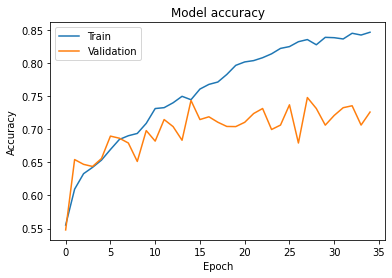

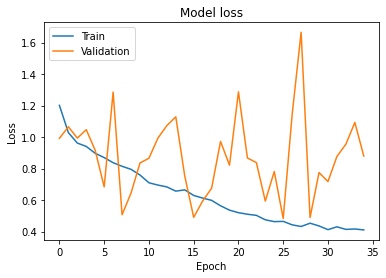

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
loss_val, acc_val = model.evaluate(valid_X, valid_y, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

1000/1000 [==============================] - 1s 1ms/step
Validation: accuracy = 0.722000  ;  loss_v = 0.844161


In [0]:
# test_y2 = to_categorical(test_y,5)

In [0]:
# loss_test, acc_test = model.evaluate(test_X, test_y2, verbose=1)
# print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

In [0]:
# test_pred = np.argmax(model.predict(test_X),-1)
# acc = accuracy_score(test_y,test_pred)

# print(acc)

In [0]:
# path = "/content/drive/My Drive/CS412 PROJECT/Saved Models"
# model.save(path+"/128_Fine-Tune_InceptionV3_.h5")
# model.save_weights(path+"/128_Fine-Tune_InceptionV3_weights.h5")

model.save("/content/drive/My Drive/CS412 PROJECT/Final Notebooks/models/InceptionV3_fine_model_crop.h5")
model.save_weights("/content/drive/My Drive/CS412 PROJECT/Final Notebooks/weights/InceptionV3_fine_model_weights_crop.h5")

# Real Test

In [0]:
# testing_data = []

In [0]:
# testing_data = pickle.load(open("/content/drive/My Drive/CS412 PROJECT/Pickle Database/Testing_data_trimmed_no_crop.pickle", "rb"))

In [0]:
# print(len(testing_data))

In [0]:
# for i in range(len(testing_data)):
#     testing_data[i] = cv2.resize(testing_data[i], (IMG_SIZE,IMG_SIZE) )

In [0]:
# print(len(testing_data))

In [0]:
# see_data_t(1006)

In [0]:
# testing_data = np.array(testing_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)

# testing_data = testing_data / 255.0

# len(testing_data)

In [0]:
# predictions = np.argmax(model.predict(testing_data),-1)

In [0]:
# results = []
# for i in range(len(predictions)):
#     results.append(predictions[i]+1)

In [0]:
# print(results)

# Printing Data to CSV

In [0]:
# from google.colab import files

# fileName = "8k_50x50_2x2_64-128_128-256.csv"

# def printResult(images,labels): 
#     file = open(fileName,"w")

#     if(len(images) != len(labels)):
#         print("Error with the dimensions.")
#         return False
#     else:
#         file.write("Id,Category\n")
#         for i in range(len(images)):
#             file.write( str(images[i]) + "," + str(labels[i]) + "\n")
#         return True

# csv_images = []
# for i in range(10001,15001):
# 	csv_images.append("Image_" + str(i))

# if( printResult(csv_images,results) ):
#     files.download(filename= fileName)
# else:
#     print("Cannot download...")